# 5. Using Calculation Setups

Calculation setups are a way to efficiently do LCA calculations for multiple functional units and methods at the same time.

This notebook builds on the [Tutorial 4 - LCA with real data](BW_Tutorial_4_LCA_Real_Data.ipynb) notebook, or its original version by Chris Mutel [Getting Started with Brightway2](https://github.com/brightway-lca/brightway2/blob/master/notebooks/Getting%20Started%20with%20Brightway2.ipynb), and won't work if you haven't done that notebook yet. This is because we will be using the same database loaded in that project.

In [1]:
from brightway2 import *

Let's copy the project from the previous tutorial. Here I copy the project _I_ made, if you are following Chris Mutel's tutorial use his project naming do there is no confusion!

In [8]:
if "Tut_5_Calculation_Setups" not in projects:
    projects.set_current("Tut_4_RealLCA")
    projects.copy_project("Tut_5_Calculation_Setups")
else:
    projects.set_current("Tut_5_Calculation_Setups")

### Defining a calculation setup

A calculation setup is defined by three things:
* A name.
* A list of functional units.
* A list of LCIA methods.

In this example, we will choose both activities and methods at random.

In [14]:
functional_units = [{Database('forwast').random(): 1} for _ in range(20)] # Here we select 20 random functional units.


As said in the previous tutorial, we can't choose methods completely at random, since the FORWAST database doesn't have as many biosphere flows as ecoinvent, so many methods will only characterize flows that aren't provided anywhere in FORWAST. So lets only choose from the methods which will have a non-zero LCA score:

In [15]:
import random

all_forwast_flows = {exc.input for ds in Database("forwast") for exc in ds.biosphere()}
suitable_methods = [method 
                    for method in methods 
                    if {cf[0] for cf in Method(method).load()}.intersection(all_forwast_flows)]

print("Can use {} of {} LCIA methods".format(len(suitable_methods), len(methods)))
chosen_methods = random.sample(suitable_methods, 8)

Can use 450 of 975 LCIA methods


A calculation setup is a normal Python dictionary, with keys `inv` and `ia`, for the functional units and LCIA methods, respectively.

In [16]:
my_calculation_setup = {'inv': functional_units, 'ia': chosen_methods}

You define a calculation setup by name in the metadata store `calculation_setups`, similar to the way that LCIA methods are defined.

In [32]:
calculation_setups['some random stuff'] = my_calculation_setup

In [35]:
calculation_setups['some random stuff']

{'inv': [{'_36 Refined petroleum products and fuels, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003']): 1},
  {'_86 Transport by ship, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_23 Flour, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_17 Clay and soil from quarry, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_99 Education services, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_87 Air transport, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
  {'105 Waste treatment, Incineration of waste, Glass' (kilogram, inert, EU27, ['Input Output', 'EU27 2003']): 1},
  {'130 Household use, Leisure, DK' (EUR2003, GLO, ['Input Output', 'Denmark 2003']): 1},
  {'102 Waste treatment, Incineration of waste, Paper, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'120 Waste treatment, Landfill of waste, Alu, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_77 Transport by ship, DK' (EUR2003, GLO, ['

The normal create, update, and delete machanisms apply:

* To create a new calculation setup, assign by name, as in cell above
* To replace a calculation setup, just assign new data, i.e. `calculation_setups['some random stuff'] = some_new_stuff`.
* To delete a calculation setup, use `del`, i.e. `del calculation_setups['some random stuff']`.


### Using a calculation setup

Use the `MultiLCA` class to get LCA results for a calculation setup. Note that this class does all the calculations as soon as you create it.

In [37]:
mlca = MultiLCA('some random stuff')
mlca.results

array([[ 5.35742799e-05,  2.98778095e-01,  2.49194324e-04,
         2.27312489e-04,  1.62471404e-01,  2.99570126e-01,
         6.51553389e-07,  1.21698482e+00],
       [ 7.78800398e-04,  4.01196656e+00,  1.53680671e-02,
         5.53892397e-03,  4.39404917e-01,  3.94859979e+00,
         4.21140466e-06,  1.37433980e+00],
       [ 3.97669747e-04,  1.00844753e+00,  6.66135776e-04,
         3.39897652e-04,  5.72948145e-02,  1.01795237e+00,
         2.01686265e-06,  1.36264644e-01],
       [ 1.51496976e-05,  1.41430162e-02,  1.49135978e-05,
         6.68766721e-06,  1.32163715e-03,  1.38643747e-02,
         7.41660516e-08,  4.06252650e-03],
       [ 3.66668933e-04,  3.26346428e-01,  3.03195576e-04,
         1.21814865e-04,  2.86057222e-02,  3.22808140e-01,
         1.78577043e-06,  8.69991737e-02],
       [ 6.18525590e-04,  1.80672790e+00,  2.12232707e-03,
         1.22653980e-03,  1.76191297e-01,  1.73278642e+00,
         3.17856431e-06,  5.81842689e-01],
       [ 1.02550140e-04, -3.859627

### Visualizing the results

There isn't any code built into Brightway2 yet, but [Seaborn](http://seaborn.pydata.org/index.html) has some great visualizations for this type of result array. You will need to install Seaborn in your environment if you don't have it already!

In [38]:
%matplotlib inline

Ignore them warnings.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

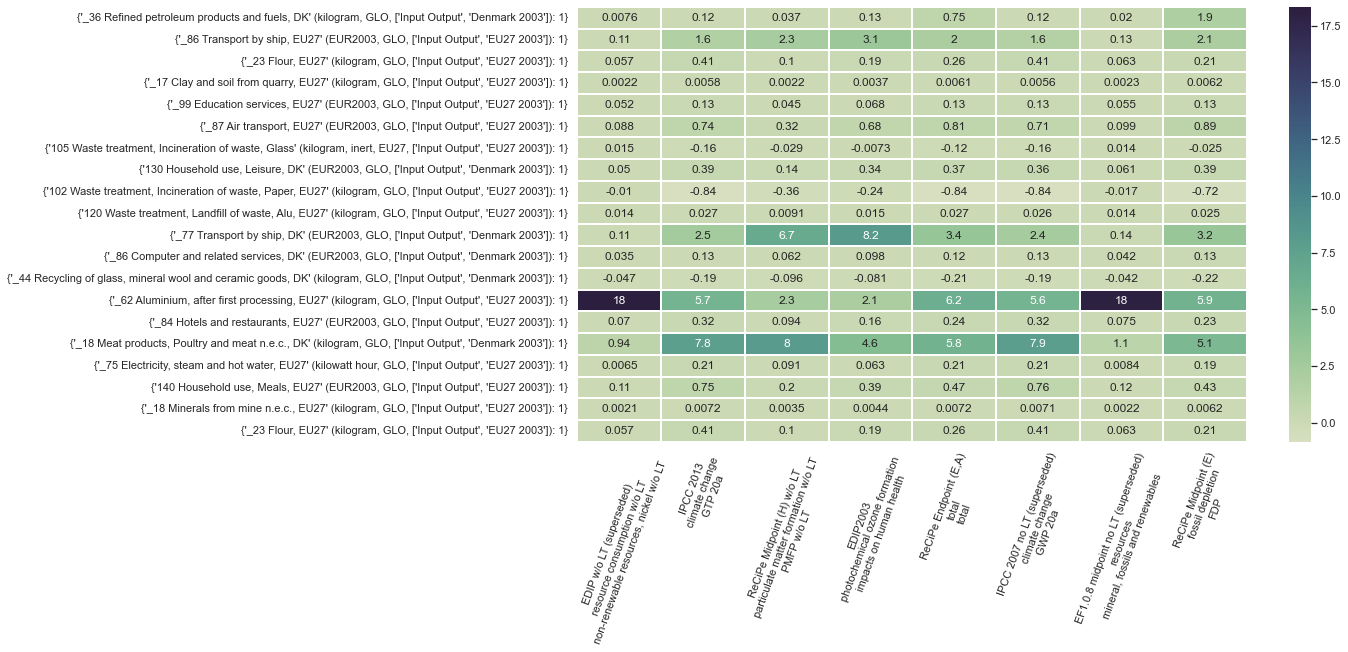

In [79]:
# From https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True) 
sns.set(rc = {'figure.figsize':(15,8)})  # Heatmap size
sns.heatmap(
    mlca.results / np.average(mlca.results, axis=0), # Normalize to get relative results
    annot=True, 
    linewidths=.05, 
    cmap=cmap, 
    xticklabels=["\n".join(x) for x in mlca.methods],
    yticklabels=[y for y in mlca.func_units]
)
plt.xticks(rotation=70); 

In [52]:
print(dir(mlca))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'all', 'func_units', 'lca', 'method_matrices', 'methods', 'results']


In [73]:
mlca.func_units[:]

[{'_36 Refined petroleum products and fuels, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003']): 1},
 {'_86 Transport by ship, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
 {'_23 Flour, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
 {'_17 Clay and soil from quarry, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
 {'_99 Education services, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
 {'_87 Air transport, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
 {'105 Waste treatment, Incineration of waste, Glass' (kilogram, inert, EU27, ['Input Output', 'EU27 2003']): 1},
 {'130 Household use, Leisure, DK' (EUR2003, GLO, ['Input Output', 'Denmark 2003']): 1},
 {'102 Waste treatment, Incineration of waste, Paper, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
 {'120 Waste treatment, Landfill of waste, Alu, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
 {'_77 Transport by ship, DK' (EUR2003, GLO, ['Input Output', 'De

In [74]:
mlca.methods

[('EDIP w/o LT (superseded)',
  'resource consumption w/o LT',
  'non-renewable resources, nickel w/o LT'),
 ('IPCC 2013', 'climate change', 'GTP 20a'),
 ('ReCiPe Midpoint (H) w/o LT',
  'particulate matter formation w/o LT',
  'PMFP w/o LT'),
 ('EDIP2003', 'photochemical ozone formation', 'impacts on human health'),
 ('ReCiPe Endpoint (E,A)', 'total', 'total'),
 ('IPCC 2007 no LT (superseded)', 'climate change', 'GWP 20a'),
 ('EF1.0.8 midpoint no LT (superseded)',
  'resources',
  'mineral, fossils and renewables'),
 ('ReCiPe Midpoint (E)', 'fossil depletion', 'FDP')]